In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sushi_df = pd.read_csv('filtered_sushi_pa_reviews.csv')


print("Total Number of Reviews in Dataset:", sushi_df.shape[0], "\n")

Total Number of Reviews in Dataset: 73601 



In [2]:
nan_count = sushi_df.isna().sum()
print("Count of NaN values in each column:")
print(nan_count) # 176 (address) + 19 (attributes) + hours (3424) = 3619, so 3619/ 73601 = 0.04 % so we can drop these rows
print("\n")

sushi_df= sushi_df.dropna()
#print(sushi_df)

print("Total Number of Reviews in Dataset (After remove NaN):", sushi_df.shape[0], "\n")

Count of NaN values in each column:
business_id        0
name               0
address          176
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes        19
categories         0
hours           3424
review_id          0
user_id            0
user_rating        0
useful             0
funny              0
cool               0
text               0
date               0
dtype: int64


Total Number of Reviews in Dataset (After remove NaN): 69996 



In [3]:
open_df = sushi_df[sushi_df['is_open'] == 1]
#print(open_df)
print("Total Number of Reviews (OPEN):", open_df.shape[0], "\n")

closed_df = sushi_df[sushi_df['is_open'] == 0]
#print(closed_df)
print("Total Number of Reviews (CLOSED):", closed_df.shape[0], "\n")

Total Number of Reviews (OPEN): 58131 

Total Number of Reviews (CLOSED): 11865 



In [4]:
open_postal = open_df.groupby('postal_code')['business_id'].nunique().reset_index(name='restaurant count')
closed_postal = closed_df.groupby('postal_code')['business_id'].nunique().reset_index(name='restaurant count')

print("Open Restaurants by Postal Code:", open_postal['restaurant count'].sum())
print(open_postal)

print("Closed Restaurants by Postal Code:", closed_postal['restaurant count'].sum())
print(closed_postal)

Open Restaurants by Postal Code: 365
     postal_code  restaurant count
0          18901                 5
1          18902                 1
2          18914                 1
3          18929                 1
4          18936                 1
..           ...               ...
107        19465                 1
108        19468                 3
109        19474                 1
110        19477                 1
111        19512                 1

[112 rows x 2 columns]
Closed Restaurants by Postal Code: 183
    postal_code  restaurant count
0         18901                 1
1         18966                 1
2         18976                 1
3         19001                 1
4         19003                 4
..          ...               ...
72        19462                 2
73        19464                 1
74        19468                 2
75        19474                 2
76        19477                 1

[77 rows x 2 columns]


In [5]:
open_postal = open_df.groupby('postal_code').size().reset_index(name='review counts')
closed_postal = closed_df.groupby('postal_code').size().reset_index(name='review counts')

print("Total Number Postal Codes with Open Restaraunts:", open_postal.shape[0], "\n")
print(open_postal)

print("Total Number Postal Codes with Closed Restaraunts:", closed_postal.shape[0], "\n")
print(closed_postal)

Total Number Postal Codes with Open Restaraunts: 112 

     postal_code  review counts
0          18901            662
1          18902             41
2          18914            268
3          18929             81
4          18936            277
..           ...            ...
107        19465             53
108        19468            300
109        19474             10
110        19477            175
111        19512             45

[112 rows x 2 columns]
Total Number Postal Codes with Closed Restaraunts: 77 

    postal_code  review counts
0         18901             61
1         18966              8
2         18976              7
3         19001             28
4         19003            332
..          ...            ...
72        19462            194
73        19464             46
74        19468             74
75        19474            107
76        19477              6

[77 rows x 2 columns]


In [6]:
open_postal_df = open_df.sort_values(by=['postal_code', 'business_id']).reset_index(drop=True)
print(open_postal_df)

                  business_id          name                 address  \
0      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
1      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
2      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
3      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
4      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
...                       ...           ...                     ...   
58126  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58127  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58128  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58129  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58130  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   

             city state  postal_code   latitude  longitude  stars  \
0      Doylestown    PA        18901  40.324073 -75.133962    3.0   
1      Do

In [7]:
closed_postal_df = closed_df.sort_values(by=['postal_code', 'business_id']).reset_index(drop=True)
print(closed_postal_df)

                  business_id                             name  \
0      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
1      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
2      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
3      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
4      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
...                       ...                              ...   
11860  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11861  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11862  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11863  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11864  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   

                             address          city state  postal_code  \
0                      34 W State St    Doylestown    PA        18901   
1                      34 W State St    Doylestown    PA     

In [8]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def normalize(review, lowercase=True, remove_stopwords=True):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = [token.lemma_ for token in doc if not remove_stopwords or (remove_stopwords and not token.is_stop)]
    return " ".join(lemmatized)

open_postal_copy_df = open_postal_df.copy()

open_postal_copy_df ['processed'] = open_postal_copy_df ['text'].apply(normalize)

print(open_postal_copy_df)

                  business_id          name                 address  \
0      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
1      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
2      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
3      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
4      1Cm3f1ys5_sBRUBTFECnww  Weis Markets      73 Old Dublin Pike   
...                       ...           ...                     ...   
58126  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58127  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58128  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58129  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   
58130  7CCbvuuwxxvaaKqv4-WxTA  Panda Garden  850 E Philadelphia Ave   

             city state  postal_code   latitude  longitude  stars  \
0      Doylestown    PA        18901  40.324073 -75.133962    3.0   
1      Do

In [9]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def normalize(review, lowercase=True, remove_stopwords=True):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = [token.lemma_ for token in doc if not remove_stopwords or (remove_stopwords and not token.is_stop)]
    return " ".join(lemmatized)

closed_postal_copy_df = closed_postal_df.copy()

closed_postal_copy_df ['processed'] = closed_postal_copy_df ['text'].apply(normalize)

print(closed_postal_copy_df)

                  business_id                             name  \
0      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
1      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
2      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
3      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
4      ZzrQzFkhCHDLq_0Bbko3lg  To-Yo Japanese Restaurant & Bar   
...                       ...                              ...   
11860  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11861  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11862  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11863  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   
11864  XBRPLyAbJec113a-j-_sCg       Miraku Japanese Restaurant   

                             address          city state  postal_code  \
0                      34 W State St    Doylestown    PA        18901   
1                      34 W State St    Doylestown    PA     

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 1000
tv = TfidfVectorizer(max_features=max_features)

X_tfidf_open = tv.fit_transform(open_postal_copy_df['processed']).toarray()

print("Shape after TFIDF:", X_tfidf_open.shape)

Shape after TFIDF: (58131, 1000)


In [11]:
max_features = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

X_tfidf_closed = tfidf_vectorizer.fit_transform(closed_postal_copy_df['processed']).toarray()

print("Shape after TFIDF:", X_tfidf_closed.shape)

Shape after TFIDF: (11865, 1000)


In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sentimentAnalyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nmtv2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

def calculate_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    compound_score = scores['compound']
    return 1 if compound_score >= 0 else 0  # Converts to binary: 1 for positive, 0 for negative

open_postal_copy_df['sentiment'] = open_postal_copy_df['processed'].apply(calculate_sentiment)

y = open_postal_copy_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_open, y, test_size=0.2, random_state=42)

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

performance = metrics.classification_report(y_test, y_pred, target_names=['negative', 'positive'])
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Classification Report:")
print(performance)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.51      0.63       780
    positive       0.97      0.99      0.98     10847

    accuracy                           0.96     11627
   macro avg       0.91      0.75      0.81     11627
weighted avg       0.96      0.96      0.96     11627

Accuracy: 0.960694934204868


In [14]:
print(open_postal_copy_df['sentiment'])

0        1
1        1
2        1
3        1
4        0
        ..
58126    0
58127    1
58128    1
58129    1
58130    0
Name: sentiment, Length: 58131, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

def calculate_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    compound_score = scores['compound']
    return 1 if compound_score >= 0 else 0  # Converts to binary: 1 for positive, 0 for negative

closed_postal_copy_df['sentiment'] = closed_postal_copy_df['processed'].apply(calculate_sentiment)

y = closed_postal_copy_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_closed, y, test_size=0.2, random_state=42)

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

performance = metrics.classification_report(y_test, y_pred, target_names=['negative', 'positive'])
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Classification Report:")
print(performance)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.31      0.47       219
    positive       0.93      1.00      0.97      2154

    accuracy                           0.94      2373
   macro avg       0.95      0.65      0.72      2373
weighted avg       0.94      0.94      0.92      2373

Accuracy: 0.9351032448377581


In [16]:
print(closed_postal_copy_df['sentiment'])

0        1
1        1
2        1
3        1
4        1
        ..
11860    1
11861    1
11862    0
11863    1
11864    1
Name: sentiment, Length: 11865, dtype: int64


In [17]:
avg_open = open_postal_df.groupby('postal_code')['user_rating'].mean().reset_index()
print(avg_open)

     postal_code  user_rating
0          18901     3.741692
1          18902     3.609756
2          18914     4.447761
3          18929     3.382716
4          18936     3.729242
..           ...          ...
107        19465     4.150943
108        19468     4.316667
109        19474     4.600000
110        19477     3.651429
111        19512     3.977778

[112 rows x 2 columns]


In [18]:
avg_closed = closed_postal_df.groupby('postal_code')['user_rating'].mean().reset_index()
print(avg_closed)

    postal_code  user_rating
0         18901     3.737705
1         18966     3.375000
2         18976     3.000000
3         19001     3.892857
4         19003     4.207831
..          ...          ...
72        19462     3.036082
73        19464     1.956522
74        19468     3.337838
75        19474     3.887850
76        19477     4.166667

[77 rows x 2 columns]


In [19]:
sum_pos = (closed_postal_copy_df['sentiment'] == 1).sum()
sum_neg = (closed_postal_copy_df['sentiment'] == 0).sum()

print("For Closed:")
print("Sum of +ve reviews:", sum_pos)
print("Sum of -ve reviews:", sum_neg)

For Closed:
Sum of +ve reviews: 10815
Sum of -ve reviews: 1050


In [20]:
sum_pos = (open_postal_copy_df['sentiment'] == 1).sum()
sum_neg = (open_postal_copy_df['sentiment'] == 0).sum()

print("For Opened:")
print("Sum of +ve reviews:", sum_pos)
print("Sum of -ve reviews:", sum_neg)

For Opened:
Sum of +ve reviews: 54032
Sum of -ve reviews: 4099


In [21]:
grouped_sentiments = open_postal_copy_df.groupby('postal_code')['sentiment'].value_counts().unstack().fillna(0)

grouped_sentiments.columns = ['Negative Review Count', 'Positive Review Count']

grouped_sentiments = grouped_sentiments.astype(int)

grouped_sentiments = grouped_sentiments.reset_index()

print("For Open:")
print(grouped_sentiments)

For Open:
     postal_code  Negative Review Count  Positive Review Count
0          18901                     67                    595
1          18902                      7                     34
2          18914                      7                    261
3          18929                      9                     72
4          18936                     19                    258
..           ...                    ...                    ...
107        19465                      1                     52
108        19468                     15                    285
109        19474                      0                     10
110        19477                     16                    159
111        19512                      4                     41

[112 rows x 3 columns]


In [22]:
grouped_sentiments = closed_postal_copy_df.groupby('postal_code')['sentiment'].value_counts().unstack().fillna(0)

grouped_sentiments.columns = ['Negative Review Count', 'Positive Review Count']

grouped_sentiments = grouped_sentiments.astype(int)

grouped_sentiments = grouped_sentiments.reset_index()

print("For Closed:")
print(grouped_sentiments)

For Closed:
    postal_code  Negative Review Count  Positive Review Count
0         18901                      8                     53
1         18966                      1                      7
2         18976                      1                      6
3         19001                      2                     26
4         19003                     20                    312
..          ...                    ...                    ...
72        19462                     33                    161
73        19464                     16                     30
74        19468                      9                     65
75        19474                      8                     99
76        19477                      1                      5

[77 rows x 3 columns]


In [23]:
open_postal_copy_df['date'] = pd.to_datetime(open_postal_copy_df['date'])

grouped_sentiments = open_postal_copy_df.groupby([open_postal_copy_df['date'].dt.year, 'sentiment'])['sentiment'].count().unstack().fillna(0)

grouped_sentiments.columns = ['negative count', 'positive count']

grouped_sentiments = grouped_sentiments.astype(int)

grouped_sentiments = grouped_sentiments.reset_index()

print(grouped_sentiments)

    date  negative count  positive count
0   2005               0               8
1   2006               0              45
2   2007               7             163
3   2008              20             534
4   2009              53             940
5   2010              83            1587
6   2011              97            2011
7   2012             172            2659
8   2013             219            3142
9   2014             276            3994
10  2015             402            4654
11  2016             419            5415
12  2017             504            6312
13  2018             534            6875
14  2019             576            7475
15  2020             318            3694
16  2021             393            4277
17  2022              26             247


C:\Users\nmtv2\AppData\Local\Temp\ipykernel_12640\1551225290.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


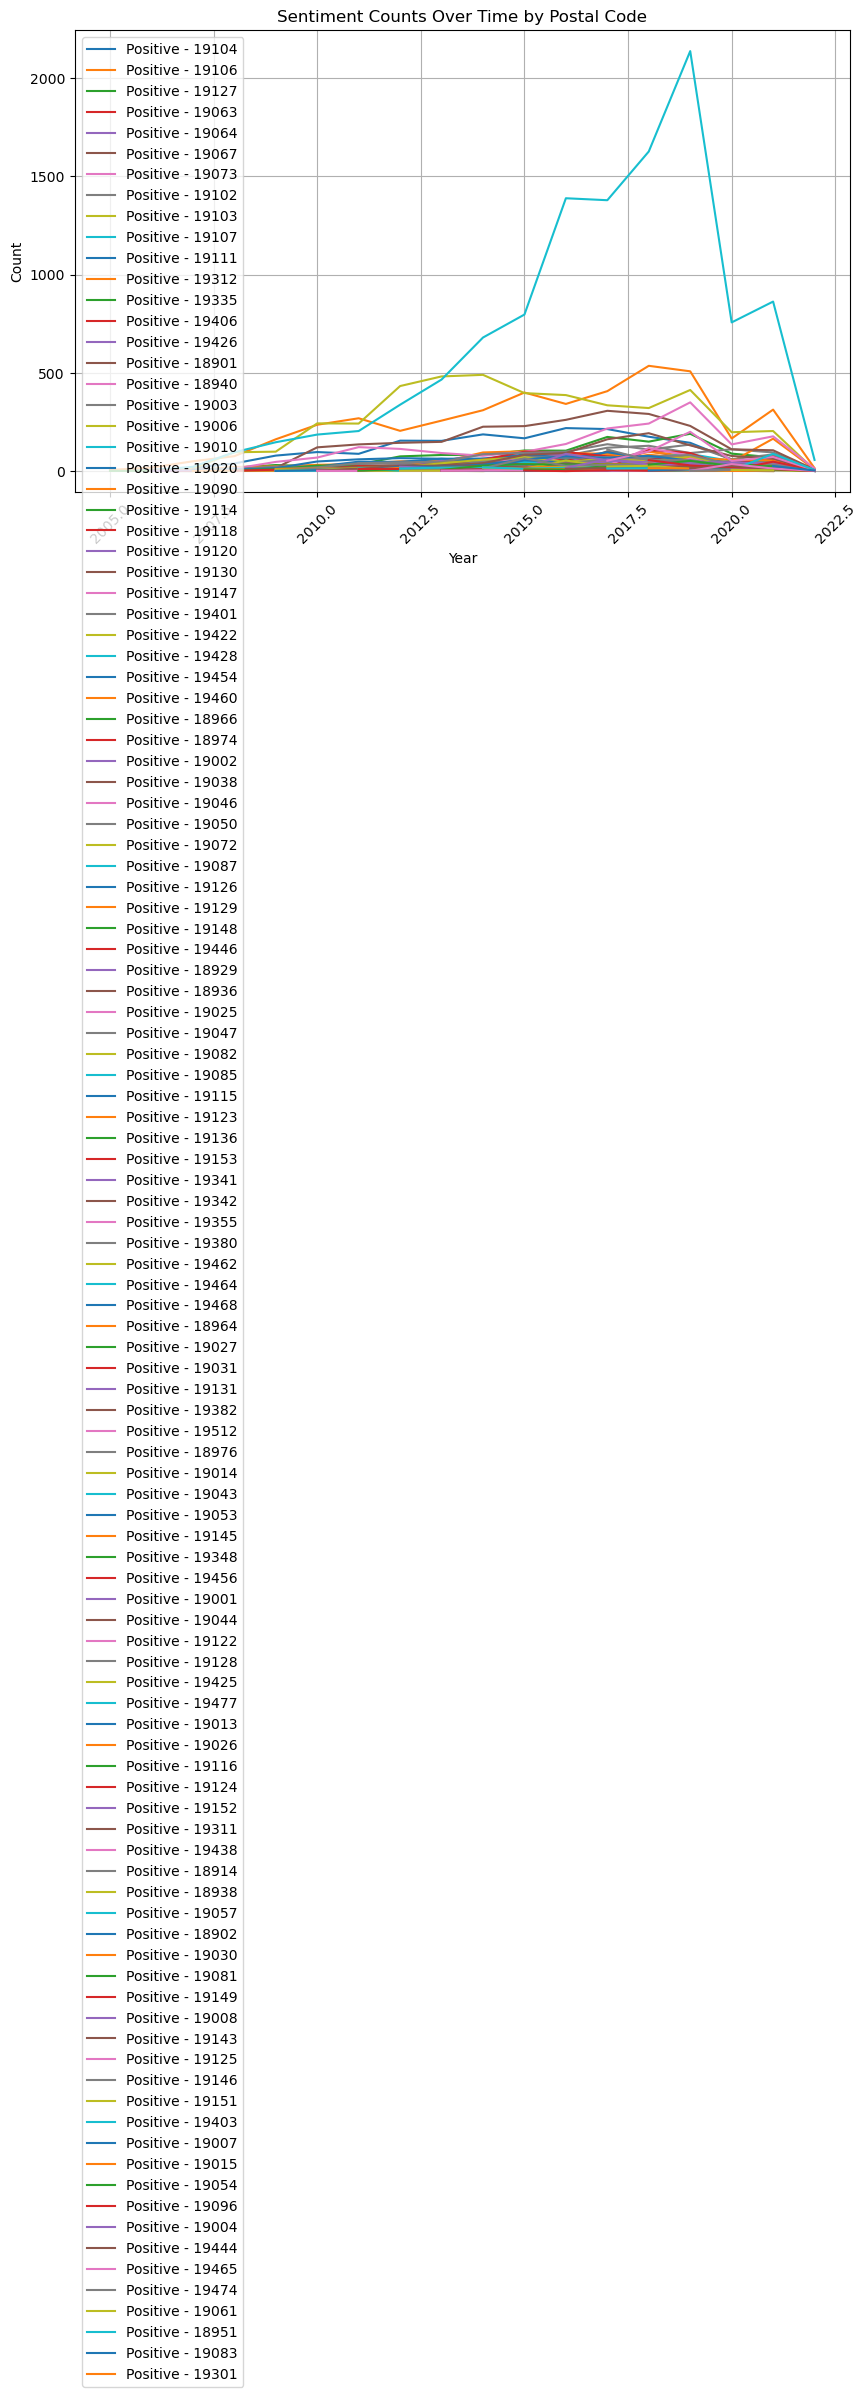

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

open_postal_copy_df['date'] = pd.to_datetime(open_postal_copy_df['date'])

grouped_sentiments = open_postal_copy_df.groupby([open_postal_copy_df['date'].dt.year, 'postal_code', 'sentiment'])['sentiment'].count().unstack().fillna(0)

grouped_sentiments.columns = ['negative count', 'positive count']

grouped_sentiments = grouped_sentiments.astype(int)

grouped_sentiments = grouped_sentiments.reset_index()

postal_codes = grouped_sentiments['postal_code'].unique()

plt.figure(figsize=(10, 6))

for postal_code in postal_codes:
    df_postal = grouped_sentiments[grouped_sentiments['postal_code'] == postal_code]
    plt.plot(df_postal['date'], df_postal['positive count'], label=f'Positive - {postal_code}')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sentiment Counts Over Time by Postal Code')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\nmtv2\AppData\Local\Temp\ipykernel_12640\958322090.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_reviews = grouped_sentiments.groupby('date')['negative count', 'positive count'].sum()
C:\Users\nmtv2\AppData\Local\Temp\ipykernel_12640\958322090.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


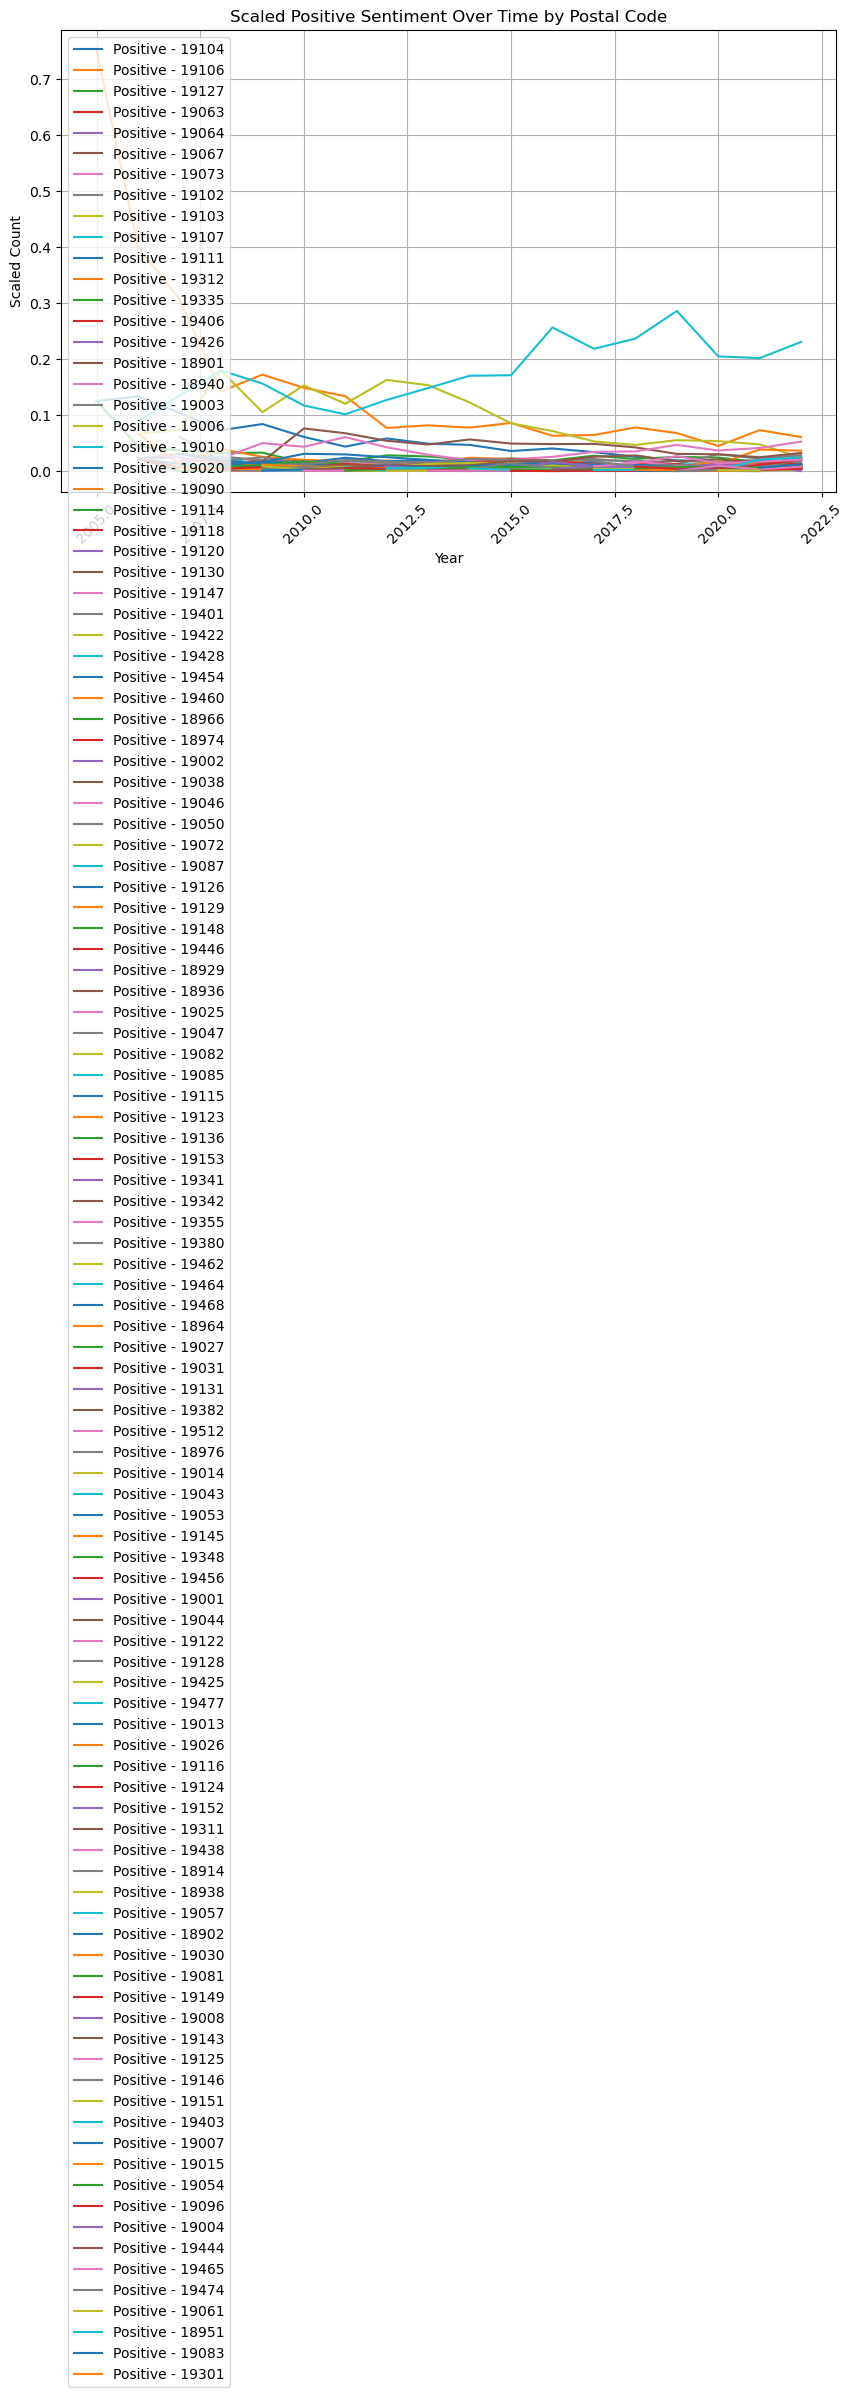

In [25]:
open_postal_copy_df['date'] = pd.to_datetime(open_postal_copy_df['date'])

# Group by year, postal code, and sentiment, then unstack to get counts
grouped_sentiments = open_postal_copy_df.groupby([open_postal_copy_df['date'].dt.year, 'postal_code', 'sentiment'])['sentiment'].count().unstack().fillna(0)

# Rename columns for clarity
grouped_sentiments.columns = ['negative count', 'positive count']

# Convert counts to integers
grouped_sentiments = grouped_sentiments.astype(int)

# Reset index to make 'year' and 'postal_code' regular columns
grouped_sentiments = grouped_sentiments.reset_index()

# Calculate total reviews per year
total_reviews = grouped_sentiments.groupby('date')['negative count', 'positive count'].sum()
total_reviews.columns = ['total_negative', 'total_positive']

# Merge total reviews back to grouped_sentiments
grouped_sentiments = pd.merge(grouped_sentiments, total_reviews, left_on='date', right_index=True)

# Scale positive and negative counts
grouped_sentiments['scaled_positive'] = grouped_sentiments['positive count'] / grouped_sentiments['total_positive']
grouped_sentiments['scaled_negative'] = grouped_sentiments['negative count'] / grouped_sentiments['total_negative']

# Plotting
postal_codes = grouped_sentiments['postal_code'].unique()

plt.figure(figsize=(10, 6))

for postal_code in postal_codes:
    df_postal = grouped_sentiments[grouped_sentiments['postal_code'] == postal_code]
    plt.plot(df_postal['date'], df_postal['scaled_positive'], label=f'Positive - {postal_code}')

plt.xlabel('Year')
plt.ylabel('Scaled Count')
plt.title('Scaled Positive Sentiment Over Time by Postal Code')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\nmtv2\AppData\Local\Temp\ipykernel_12640\1054544480.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_reviews = grouped_sentiments.groupby('year')['negative count', 'positive count'].sum()


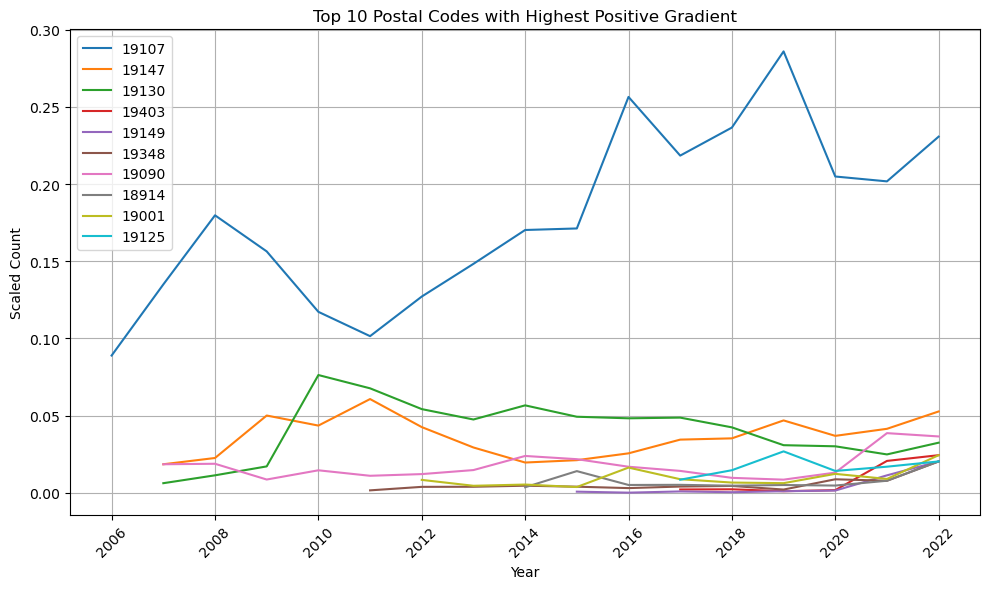

In [26]:
open_postal_copy_df['date'] = pd.to_datetime(open_postal_copy_df['date'])

open_postal_copy_df['year'] = open_postal_copy_df['date'].dt.year

grouped_sentiments = open_postal_copy_df.groupby(['year', 'postal_code', 'sentiment'])['sentiment'].count().unstack().fillna(0)

grouped_sentiments.columns = ['negative count', 'positive count']

grouped_sentiments = grouped_sentiments.astype(int)

grouped_sentiments = grouped_sentiments.reset_index()

total_reviews = grouped_sentiments.groupby('year')['negative count', 'positive count'].sum()
total_reviews.columns = ['total_negative', 'total_positive']

grouped_sentiments = pd.merge(grouped_sentiments, total_reviews, left_on='year', right_index=True)

grouped_sentiments['scaled_positive'] = grouped_sentiments['positive count'] / grouped_sentiments['total_positive']
grouped_sentiments['scaled_negative'] = grouped_sentiments['negative count'] / grouped_sentiments['total_negative']

grouped_sentiments['gradient'] = grouped_sentiments.groupby('postal_code')['scaled_positive'].diff() / grouped_sentiments.groupby('postal_code')['year'].diff()

# Calculate total gradient for each postal code
total_gradients = grouped_sentiments.groupby('postal_code')['gradient'].sum()

# Sort by total gradient to get top 10
top_10_postal = total_gradients.nlargest(10).index

# Filter only the top 10 postal codes
top_10_df = grouped_sentiments[grouped_sentiments['postal_code'].isin(top_10_postal)]

plt.figure(figsize=(10, 6))

for postal_code in top_10_postal:
    df_postal = top_10_df[top_10_df['postal_code'] == postal_code]
    plt.plot(df_postal['year'], df_postal['scaled_positive'], label= postal_code)

plt.xlabel('Year')
plt.ylabel('Scaled Count')
plt.title('Top 10 Postal Codes with Highest Positive Gradient')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\nmtv2\AppData\Local\Temp\ipykernel_12640\1898420918.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_reviews = grouped_sentiments.groupby('year')['negative count', 'positive count'].sum()


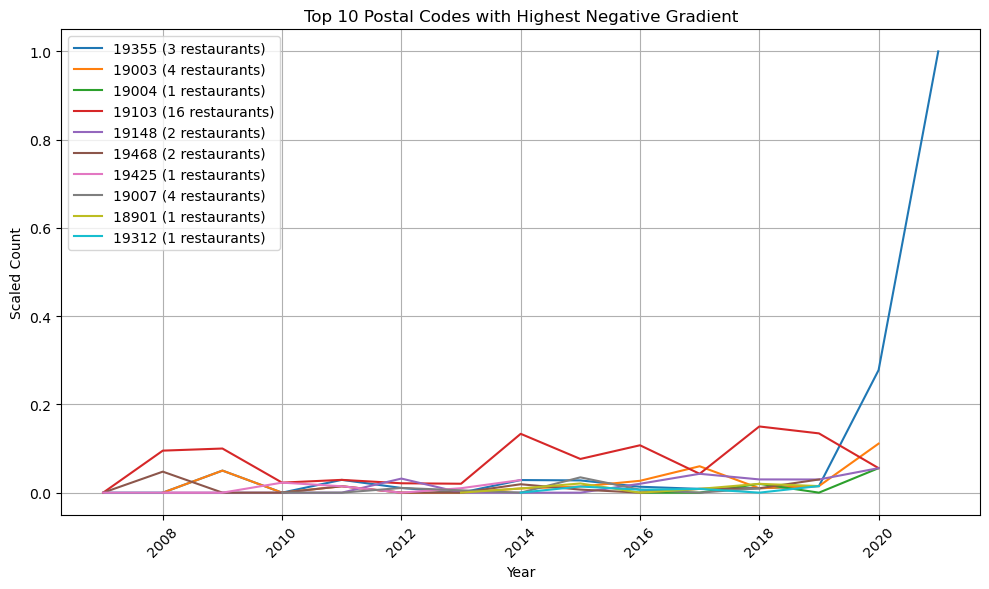

In [27]:
closed_postal_copy_df['date'] = pd.to_datetime(closed_postal_copy_df['date'])
closed_postal_copy_df['year'] = closed_postal_copy_df['date'].dt.year

grouped_sentiments = closed_postal_copy_df.groupby(['year', 'postal_code', 'sentiment'])['sentiment'].count().unstack().fillna(0)
grouped_sentiments.columns = ['negative count', 'positive count']
grouped_sentiments = grouped_sentiments.astype(int)
grouped_sentiments = grouped_sentiments.reset_index()

total_reviews = grouped_sentiments.groupby('year')['negative count', 'positive count'].sum()
total_reviews.columns = ['total_negative', 'total_positive']

grouped_sentiments = pd.merge(grouped_sentiments, total_reviews, left_on='year', right_index=True)

grouped_sentiments['scaled_positive'] = grouped_sentiments['positive count'] / grouped_sentiments['total_positive']
grouped_sentiments['scaled_negative'] = grouped_sentiments['negative count'] / grouped_sentiments['total_negative']

grouped_sentiments['gradient'] = grouped_sentiments.groupby('postal_code')['scaled_negative'].diff() / grouped_sentiments.groupby('postal_code')['year'].diff()

# Calculate total gradient for each postal code
total_gradients = grouped_sentiments.groupby('postal_code')['gradient'].sum()

# Sort by total gradient to get top 10
top_10_postal = total_gradients.nlargest(10).index

# Filter only the top 10 postal codes
top_10_df = grouped_sentiments[grouped_sentiments['postal_code'].isin(top_10_postal)]

# Count of unique restaurants for each postal code
unique_restaurants = closed_postal_copy_df.groupby('postal_code')['business_id'].nunique()

# Merge with top 10 postal codes
top_10_df = pd.merge(top_10_df, unique_restaurants, on='postal_code', how='left')

plt.figure(figsize=(10, 6))

for postal_code in top_10_postal:
    df_postal = top_10_df[top_10_df['postal_code'] == postal_code]
    plt.plot(df_postal['year'], df_postal['scaled_negative'], label=f"{postal_code} ({df_postal['business_id'].iloc[0]} restaurants)")

plt.xlabel('Year')
plt.ylabel('Scaled Count')
plt.title('Top 10 Postal Codes with Highest Negative Gradient')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [28]:
#TOPICAL MODELLING OF reviews of  TEN BEST AND TEN WORST postal codes

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def get_top_reviews_by_sentiment(df, sentiment, n=10):
    return df[df['sentiment'] == sentiment].nlargest(n, 'user_rating')['processed']

def perform_topic_modeling(reviews):
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(reviews)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)

    return lda, vectorizer

def display_topics(lda, vectorizer, n_words=10):
    feature_names = vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))

# Get top reviews for the ten best and ten worst postal codes
top_reviews_best = get_top_reviews_by_sentiment(open_postal_copy_df, 1, 10)
top_reviews_worst = get_top_reviews_by_sentiment(closed_postal_copy_df, 0, 10)

# Perform topic modeling
lda_best, vectorizer_best = perform_topic_modeling(top_reviews_best)
lda_worst, vectorizer_worst = perform_topic_modeling(top_reviews_worst)

# Display topics for the ten best postal codes
print("\nTopics for the Ten Best Postal Codes:")
display_topics(lda_best, vectorizer_best)

# Display topics for the ten worst postal codes
print("\nTopics for the Ten Worst Postal Codes:")
display_topics(lda_worst, vectorizer_worst)



Topics for the Ten Best Postal Codes:

Topic #1:
good balloon karen order organize time day graduation help thank

Topic #2:
weis good care family area service customer deal market day

Topic #3:
great good food quality sushi large menu rush love price

Topic #4:
food place order great lunch chinese convenient dozen year think

Topic #5:
lunch chicken staff deliver place experience particularly orange meal clean

Topics for the Ten Worst Postal Codes:

Topic #1:
close time english quickly place apartment eat speak byob beer

Topic #2:
place korean marinated bin kwan food way young great sushi

Topic #3:
time restaurant food visit fuji mt die experience service favorite

Topic #4:
rice ball try wrong stop pretty obsess believe tuna filling

Topic #5:
sushi know location fast die yo madame town roger earth


In [29]:
!pip install jupyter
!pip install nbconvert
!jupyter nbconvert "C:\Users\nmtv2\Documents\CIS509\Wasa-Bee!\Wasa-Bee!_Final.ipynb" --to html

[NbConvertApp] Converting notebook C:\Users\nmtv2\Documents\CIS509\Wasa-Bee!\Wasa-Bee!_Final.ipynb to html
[NbConvertApp] Writing 696212 bytes to C:\Users\nmtv2\Documents\CIS509\Wasa-Bee!\Wasa-Bee!_Final.html
